In [1]:
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from matplotlib.pyplot import figure


drive.mount('/content/drive')

Mounted at /content/drive


# Importar arquivo do banco de dados Anime

In [2]:
df = pd.read_csv('/content/drive/MyDrive/animes.csv')

df.loc[df['uid'] == 1333] #hub do grafo

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
14085,1333,Fushigi na Koala Blinky,"One day, Sandy's father, Prof. Brown, sends he...","['Adventure', 'Comedy', 'Kids', 'Fantasy']","Jul 7, 1984 to Dec 28, 1984",26.0,675,10314,6595.0,6.39,https://cdn.myanimelist.net/images/anime/2/432...,https://myanimelist.net/anime/1333/Fushigi_na_...


# Eliminar duplicidade de registro

In [3]:
df = df[['uid','genre']]
df = df.drop_duplicates()


# Manipular banco de dados para criar conexões

In [4]:
data = {'id' :[], 'target': []}
range = 0
for i in df.values:
  range += 1
  for j in df[range:].values:
    genre_first = eval(i[1])
    genre_second = eval(j[1])
    if (len(genre_first) > 0 and len(genre_second) > 0):
      similaridade = len(set(genre_first) & set(genre_second)) / float(len(set(genre_first) | set(genre_second))) * 100
      if(similaridade > 70):
        data['id'].append(i[0])
        data['target'].append(j[0])



# Gerar novo DataFrame com os nós e enlaces

In [5]:

G = pd.DataFrame (data, columns = ['id','target'])
Graph = nx.from_pandas_edgelist(G,source='id',target='target')
componentes = sorted(nx.connected_components(Graph), key=len, reverse=True)
maior_componente = Graph.subgraph(componentes[0])


# Obter informações do grafo gerado

Número de nós:

In [6]:
numero_nos = maior_componente.number_of_nodes()
print('Número de nós: ' + str(numero_nos))

Número de nós: 7587


Número de enlaces:

In [7]:
numero_enlaces = maior_componente.number_of_edges()
print('Número de enlaces: ' + str(numero_enlaces))


Número de enlaces: 161684


Sequência do grau

In [8]:
deg_maior_componente = [d for n,d in nx.degree(maior_componente)]
lista_com_ids = [n for n,d in nx.degree(maior_componente)]


Grau médio:

In [9]:
grau_medio = np.average([d for n,d in nx.degree(maior_componente)])
print('Grau médio: ' + str(grau_medio))

Grau médio: 42.6213259522868


Porcentagem dos nós menores que o grau médio( P(di < λ) ):

In [13]:
quantidade_nos_menor = 0
for i in deg_maior_componente:
  if i < grau_medio:
    quantidade_nos_menor += 1

porcentagem_menor = (quantidade_nos_menor * 100)/numero_nos
print("Porcentagem dos nós menores que o grau médio: " + str(porcentagem_menor))

Porcentagem dos nós menores que o grau médio: 66.86437327006722


Grau do hub:

In [ ]:
hub = np.max(deg_maior_componente)
print("Hub: " + str(hub))

deg_maior_componente.index(343) #obter indice do maior hub
print("Id do hub: " + str(lista_com_ids[1167])) #obter o anime que possui maior grau

Hub: 343
Id do hub: 1333


Tamanho médio dos caminhos:

In [ ]:
tmc =nx.average_shortest_path_length(maior_componente)
print("TMC: " + str(tmc))


TMC: 6.996597861849735


Diâmetro do grafo:

In [ ]:
diametro = nx.diameter(maior_componente)
print("Diâmetro do grafo: " + str(diametro))


Diâmetro do grafo: 20


Coeficiênte de Aglomeração:

In [ ]:
CC =nx.average_clustering(maior_componente)
print("CC: " + str(CC))


CC: 0.5869251492204625


Densidade do grafo:

In [ ]:
densidade = nx.density(maior_componente)
print("Densidade: " + str(densidade))


Densidade: 0.0056184189233175336


Eficiência dos enlaces

In [ ]:
Ef = 1 - tmc/numero_enlaces
print("Eficiência dos enlaces: "+str(Ef))

Eficiência dos enlaces: 0.9999567267146913


Histograma

H = [0.0, 0.011205019848892304, 0.013894224612626457, 0.014726597515687027, 0.01677551543091305, 0.017095658855167114, 0.015943142527852477, 0.012165450121654502, 0.011781278012549622, 0.014278396721731335, 0.012293507491356128, 0.011397105903444744, 0.008643872454859777, 0.010820847739787426, 0.008131642976053273, 0.010628761685234986, 0.006979126648738635, 0.006466897169932129, 0.003969778460750416, 0.007875528236650019, 0.0072992700729927005, 0.010564733000384172, 0.005954667691125624, 0.0032654629273914716, 0.006210782430528877, 0.0045460366244077345, 0.00627481111537969, 0.006787040594186195, 0.005570495582020745, 0.0023690613394800873, 0.0036496350364963502, 0.007747470866948393, 0.004930208733512614, 0.0030093481879882185, 0.003905749775899603, 0.004674093994109361, 0.003201434242540658, 0.002048917915226021, 0.006146753745678064, 0.0028812908182865925, 0.0018568318606735819, 0.0024971187091817133, 0.004353950569855295, 0.004610065309258548, 0.003585606351645537, 0.0009604302727

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


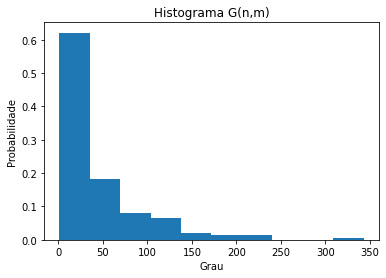

In [ ]:
deg_Graph = [d for n,d in nx.degree(maior_componente)]

#Frequência do grau 
h = [ i/Graph.number_of_nodes() for i in nx.degree_histogram(maior_componente) ]
print("H = " + str(h))

#Entropia 
I = - np.nansum(h*np.log2(h))
print("Entropia = " + str(I))

#Histograma
plt.hist(deg_maior_componente, weights= np.ones_like(deg_maior_componente) / len(deg_maior_componente))
plt.title('Histograma')
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()